# Yfinance Analyst Report test

### Import library

In [68]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

# Set some plot styles
sns.set_style('darkgrid')


### 1. Executive Summary

Use LLM to generate

Here you would write a brief summary of the stock, its current price, recommended action, and the main reasons in plain text.

Example (Markdown):

Executive Summary:

- Ticker: AAPL
- Current Price: (Code below will output current price)
- Recommendation: Buy/Hold/Sell
- Target Price: $X.XX
- Rationale: Brief explanation why.

In [69]:
ticker = "D05.SI"
stock = yf.Ticker(ticker)
info = stock.info

In [70]:
current_price = stock.history(period="1d")['Close'].iloc[-1]
print(f"Current Price: ${current_price:.2f}")


Current Price: $43.74


In [71]:
stock.analyst_price_targets


{'current': 43.74, 'low': 40.1, 'high': 50.0, 'mean': 44.61529, 'median': 44.7}

### 2. Company Overview

In [72]:
info

{'address1': 'DBS Asia Central @ Marina Bay Financial',
 'address2': 'Tower 3,12 Marina Boulevard',
 'city': 'Singapore',
 'zip': '018982',
 'country': 'Singapore',
 'phone': '65 6878 8888',
 'fax': '65 6445 1267',
 'website': 'https://www.dbs.com',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': "DBS Group Holdings Ltd provides commercial banking and financial services in Singapore, Hong Kong, rest of Greater China, South and Southeast Asia, and internationally. The company's Consumer Banking/Wealth Management segment offers banking and related financial services, including current and savings accounts, fixed deposits, loans and home finance, cards, payments, investment, and insurance products for individual customers. Its Institutional Banking segment provides financial services and products for bank 

In [73]:
# Print some basic info from yfinance
print("Company Name:", info.get('longName', 'N/A'))
print("Sector:", info.get('sector', 'N/A'))
print("Industry:", info.get('industry', 'N/A'))
print("Website:", info.get('website', 'N/A'))
print("Business Summary:\n", info.get('longBusinessSummary', 'N/A'))


Company Name: DBS Group Holdings Ltd
Sector: Financial Services
Industry: Banks - Regional
Website: https://www.dbs.com
Business Summary:
 DBS Group Holdings Ltd provides commercial banking and financial services in Singapore, Hong Kong, rest of Greater China, South and Southeast Asia, and internationally. The company's Consumer Banking/Wealth Management segment offers banking and related financial services, including current and savings accounts, fixed deposits, loans and home finance, cards, payments, investment, and insurance products for individual customers. Its Institutional Banking segment provides financial services and products for bank and non-bank financial institutions, government-linked companies, large corporates, and small and medium sized businesses. Its products and services comprise short-term working capital financing and specialized lending; cash management, trade finance, and securities and fiduciary services; treasury and markets products; and corporate finance an

In [74]:
isin = stock.isin
print(f"ISIN: {isin}")


ISIN: CNE100003NT2


In [75]:
business_summary = info.get('longBusinessSummary', 'N/A')
print(f"Business Summary: {business_summary}")


Business Summary: DBS Group Holdings Ltd provides commercial banking and financial services in Singapore, Hong Kong, rest of Greater China, South and Southeast Asia, and internationally. The company's Consumer Banking/Wealth Management segment offers banking and related financial services, including current and savings accounts, fixed deposits, loans and home finance, cards, payments, investment, and insurance products for individual customers. Its Institutional Banking segment provides financial services and products for bank and non-bank financial institutions, government-linked companies, large corporates, and small and medium sized businesses. Its products and services comprise short-term working capital financing and specialized lending; cash management, trade finance, and securities and fiduciary services; treasury and markets products; and corporate finance and advisory banking, as well as capital markets solutions. The company's Treasury Markets segment is involved in the struc

### 3. Industry and Market Analysis

In [76]:
sector = info.get('sector', 'N/A')
industry = info.get('industry', 'N/A')
print(f"Sector: {sector}")
print(f"Industry: {industry}")


Sector: Financial Services
Industry: Banks - Regional


<div class = "alert alert-block alert-danger">

Check how to use sector from yfinance to directly get for ticker and pass it to next cell for competitor check.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


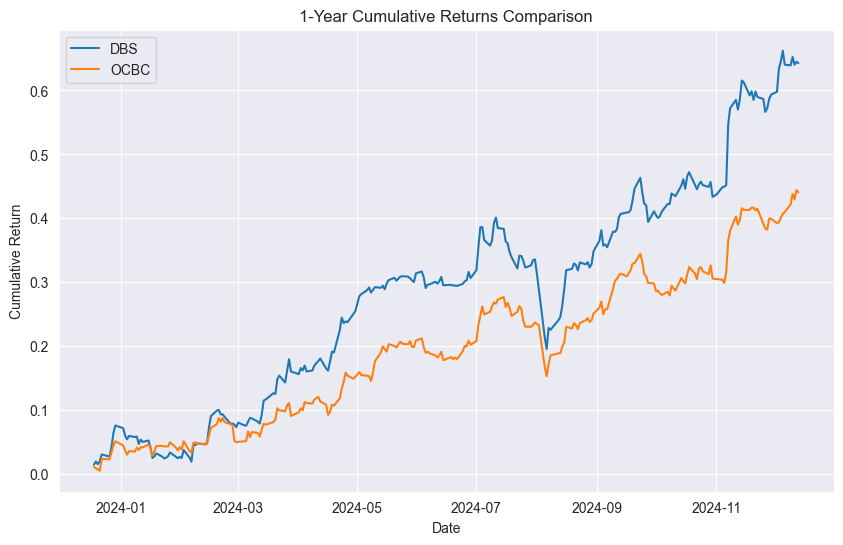

In [95]:
# Compare AAPL to another tech stock (e.g., MSFT) in terms of returns over the last year
competitor = "O39.SI"

start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

data_aapl = yf.download(ticker, start=start_date, end=end_date)
data_msft = yf.download(competitor, start=start_date, end=end_date)

# Calculate returns
data_aapl['Returns'] = data_aapl['Adj Close'].pct_change()
data_msft['Returns'] = data_msft['Adj Close'].pct_change()

cumulative_aapl = (1 + data_aapl['Returns']).cumprod() - 1
cumulative_msft = (1 + data_msft['Returns']).cumprod() - 1

plt.figure(figsize=(10,6))
plt.plot(cumulative_aapl.index, cumulative_aapl, label="DBS")
plt.plot(cumulative_msft.index, cumulative_msft, label="OCBC")
plt.title("1-Year Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


### 4. Investment Thesis

Markdown Cell:
Here you write out the main reasons for your recommendation, focusing on Apple’s revenue growth drivers, brand strength, ecosystem, etc.

No code needed here, just explanatory text.

In [78]:
# Summarize recent analyst recommendations

stock.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,3,7,7,0,0
1,-1m,3,7,7,0,0
2,-2m,3,9,4,1,0
3,-3m,3,10,3,1,0


### 5. Financial Analysis

In [79]:
# Basic Valuation Metrics using current price and fundamentals
# Note: yfinance info dictionary may provide P/E and other metrics directly
current_price = stock.history(period="1d")['Close'].iloc[-1]
pe_ratio = info.get('trailingPE', None)
forward_pe = info.get('forwardPE', None)
market_cap = info.get('marketCap', None)

print("Current Price:", current_price)
print("Market Cap:", market_cap)
print("Trailing PE:", pe_ratio)
print("Forward PE:", forward_pe)


Current Price: 43.7400016784668
Market Cap: 124403998720
Trailing PE: 11.36104
Forward PE: 11.343038


In [80]:
financials = stock.financials
quarterly_financials = stock.quarterly_financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

print("Annual Financials:")
display(financials)

print("Quarterly Financials:")
display(quarterly_financials)


Annual Financials:


,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,247779.905972,379876.358985,2126092.544987,912071.535022,NaN
Tax Rate For Calcs,0.12389,0.126625,0.125064,0.114009,NaN
Total Unusual Items,2000000.0,3000000.0,17000000.0,8000000.0,NaN
Total Unusual Items Excluding Goodwill,2000000.0,3000000.0,17000000.0,8000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,10062000000.0,8193000000.0,6805000000.0,4721000000.0,NaN
Reconciled Depreciation,746000000.0,701000000.0,669000000.0,648000000.0,NaN
Net Interest Income,13642000000.0,10941000000.0,8440000000.0,9076000000.0,NaN
Interest Expense,14220000000.0,4986000000.0,1745000000.0,3132000000.0,NaN
Interest Income,27862000000.0,15927000000.0,10185000000.0,12208000000.0,NaN
Normalized Income,10060247779.905972,8190379876.358985,6790126092.544987,4713912071.535022,NaN


Quarterly Financials:


,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-03-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.17,0.128911,0.127509,0.17,0.17,NaN
Net Income From Continuing Operation Net Minority Interest,3027000000.0,2784000000.0,2956000000.0,2169000000.0,2633000000.0,NaN
Reconciled Depreciation,6000000.0,6000000.0,6000000.0,9000000.0,0.0,NaN
Net Interest Income,3597000000.0,3452000000.0,3647000000.0,3434000000.0,3504000000.0,NaN
Interest Income,3597000000.0,11820000000.0,3647000000.0,17654000000.0,3504000000.0,NaN
Normalized Income,3027000000.0,2784000000.0,2956000000.0,2169000000.0,2633000000.0,NaN
Net Income From Continuing And Discontinued Operation,3027000000.0,2784000000.0,2956000000.0,2169000000.0,2633000000.0,NaN
Diluted Average Shares,2844173135.0,NaN,2844129158.0,NaN,2837005628.0,2836717845.0
Basic Average Shares,2844173135.0,NaN,2844129158.0,NaN,2837005628.0,2836717845.0


In [81]:
stock.income_stmt

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,247779.905972,379876.358985,2126092.544987,912071.535022,NaN
Tax Rate For Calcs,0.12389,0.126625,0.125064,0.114009,NaN
Total Unusual Items,2000000.0,3000000.0,17000000.0,8000000.0,NaN
Total Unusual Items Excluding Goodwill,2000000.0,3000000.0,17000000.0,8000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,10062000000.0,8193000000.0,6805000000.0,4721000000.0,NaN
Reconciled Depreciation,746000000.0,701000000.0,669000000.0,648000000.0,NaN
Net Interest Income,13642000000.0,10941000000.0,8440000000.0,9076000000.0,NaN
Interest Expense,14220000000.0,4986000000.0,1745000000.0,3132000000.0,NaN
Interest Income,27862000000.0,15927000000.0,10185000000.0,12208000000.0,NaN
Normalized Income,10060247779.905972,8190379876.358985,6790126092.544987,4713912071.535022,NaN


In [82]:
stock.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,9323039.0,16999972.0,21203069.0,28461400.0,NaN
Ordinary Shares Number,2837056348.0,2829379828.0,2825176317.0,2804989000.0,NaN
Share Issued,2846379387.0,2846379800.0,2846379386.0,2833450400.0,NaN
Total Debt,44829000000.0,47079000000.0,53863000000.0,45213000000.0,NaN
Tangible Book Value,55752000000.0,51547000000.0,52164000000.0,49303000000.0,NaN
Invested Capital,105426000000.0,102577000000.0,109867000000.0,98135000000.0,NaN
Net Tangible Assets,55752000000.0,51547000000.0,52164000000.0,49303000000.0,NaN
Common Stock Equity,62065000000.0,56887000000.0,57526000000.0,54626000000.0,NaN
Total Capitalization,105426000000.0,102577000000.0,109867000000.0,98135000000.0,NaN
Total Equity Gross Minority Interest,62247000000.0,57072000000.0,57714000000.0,54643000000.0,NaN


In [83]:
stock.cashflow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,4448000000.0,2100000000.0,7164000000.0,24334000000.0,NaN
Repurchase Of Capital Stock,-20000000.0,-11000000.0,-16000000.0,-1247000000.0,NaN
Repayment Of Debt,-3057000000.0,0.0,-257000000.0,0.0,NaN
Issuance Of Debt,NaN,0.0,1000000000.0,0.0,0.0
Capital Expenditure,-718000000.0,-669000000.0,-567000000.0,-547000000.0,NaN
End Cash Position,39875000000.0,43976000000.0,46690000000.0,42202000000.0,NaN
Beginning Cash Position,43976000000.0,46690000000.0,42202000000.0,19935000000.0,NaN
Effect Of Exchange Rate Changes,-805000000.0,-903000000.0,940000000.0,170000000.0,NaN
Changes In Cash,-3296000000.0,-1811000000.0,3548000000.0,22097000000.0,NaN
Financing Cash Flow,-9189000000.0,-3886000000.0,-2582000000.0,-2369000000.0,NaN


### 6. Risk and Concerns

Markdown Cell:
List the risks discovered: supply chain issues, regulatory environment, reliance on iPhone sales, competitive pressure, etc.

No code needed here.

In [84]:
# Extracting the relatedControversy cell
if 'relatedControversy' in stock.sustainability.index:
    related_controversy = stock.sustainability.loc['relatedControversy'].values[0]
    print("Related Controversy:")
    print(related_controversy)
else:
    print("The 'relatedControversy' field is not available in the sustainability data.")


Related Controversy:
['Business Ethics Incidents;Customer Incidents']


### 7. Catalysts

Markdown Cell:
Upcoming product launches, quarterly earnings reports, new market expansions, etc.

No code needed here.

In [85]:
stock.earnings_estimate

,numberOfAnalysts,avg,low,high,yearAgoEps,growth
0q,2,0.96106,0.91213,1.010,3.31818,-0.7104
+1q,2,0.96860,0.95720,0.980,4.57000,-0.7881
0y,12,3.95270,3.64000,4.100,3.60000,0.0980
+1y,12,3.85611,3.54000,4.037,3.95270,-0.0244


In [86]:
stock.revenue_estimate

,numberOfAnalysts,avg,low,high,yearAgoRevenue,growth
0q,2,5461782740,5449831000,5473734480,5007000000,0.0908
+1q,2,5608628780,5532398550,5684859000,5557000000,0.0093
0y,14,22167990840,21800300000,22609339980,20180000000,0.0985
+1y,15,22613000010,21357000000,23525000000,22167990840,0.0201


In [87]:
stock.earnings_history

,epsEstimate,epsActual,epsDifference,surprisePercent
2023-12-31,0.83924,3.31818,2.48,2.9538
2024-03-31,0.86597,4.57000,3.70,4.2773
2024-06-30,0.94013,3.93000,2.99,3.1803
2024-09-30,0.98960,4.21000,3.22,3.2542


In [100]:
stock.news

[{'uuid': '8a7f6840-60a8-3de9-8e13-94ed8cc9064c',
  'title': 'Novo Nordisk A/S: The acquisition of Catalent by Novo Holdings, and the related acquisition by Novo Nordisk of three manufacturing sites from Novo Holdings, is cleared to close',
  'publisher': 'GlobeNewswire',
  'link': 'https://finance.yahoo.com/news/novo-nordisk-acquisition-catalent-novo-050800380.html',
  'providerPublishTime': 1734152880,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/IA8XetXMAbOyKXBpUBGPHw--~B/aD00Mjc7dz02MDA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/globenewswire.com/390a90dca9ab1da0d2c89c641db85b9e',
     'width': 600,
     'height': 427,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/9H9FGaLRrg2bdOyiS8KgFQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/globenewswire.com/390a90dca9ab1da0d2c89c641db85b9e',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTick

### 8. Technical Analysis

[*********************100%***********************]  1 of 1 completed

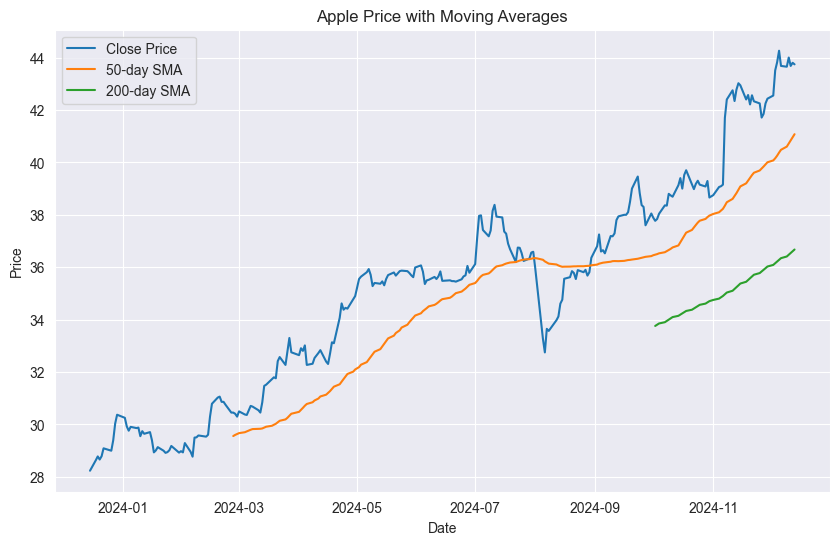

In [89]:
# Simple Moving Averages
data = yf.download(ticker, start=(datetime.now()-timedelta(days=365)).strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['SMA50'], label='50-day SMA')
plt.plot(data.index, data['SMA200'], label='200-day SMA')
plt.title("Apple Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


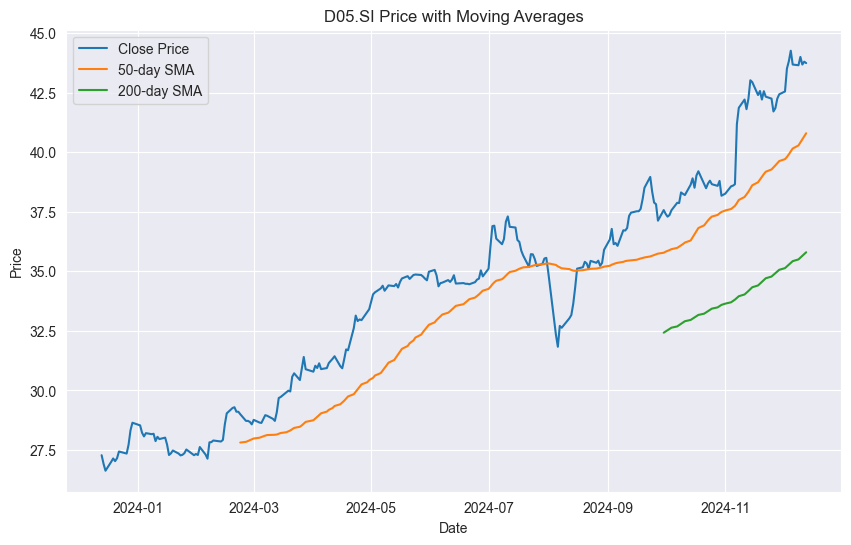

In [90]:
data = stock.history(period="1y")
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['SMA50'], label='50-day SMA')
plt.plot(data.index, data['SMA200'], label='200-day SMA')
plt.title(f"{ticker} Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


### 9. ESG Analysis

Markdown Cell:
Discuss ESG ratings from external sources. yfinance does not provide ESG data directly.

No code needed or possible with just yfinance here. Would need external data.

In [91]:
stock.sustainability

,esgScores
maxAge,86400
totalEsg,17.99
environmentScore,1.03
socialScore,10.75
governanceScore,6.21
ratingYear,2024
ratingMonth,12
highestControversy,2.0
peerCount,458
esgPerformance,LAG_PERF


### 10. Recommendations

Summarize your final recommendation (Buy/Hold/Sell) and give your price target along with the logic behind it.

In [92]:
stock.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,3,7,7,0,0
1,-1m,3,7,7,0,0
2,-2m,3,9,4,1,0
3,-3m,3,10,3,1,0


### 11. Appendices & Disclosures 

Include data tables, charts, disclaimers, and disclosure of conflicts of interest.

In [98]:
stock.insider_transactions

""
